This code is for M_SD_50 (Matrix seed dispersal 30x20)

In [1]:
#Libraries needed
import igraph as ig
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [2]:
########## Program #########
dir = os.getcwd()  # Folder where the program is
Experiment = 'M_SD_50' #Name of the experiment
beta = 0.002 # Values of beta, in this case 0.01 as this value as forced
Normalized = 0.75 #Value to normalize the matrix

In [3]:
MGL = [] #Matrix from the databases, narmalized
MCL = [] # Matrix from the databases, normalized and put in the form of (6) matrix from the paper 
VL = [] # Vector with the number of vertex of each web
D1 = [] # Vector with the dimension 1 of each web
D2 = [] # Equal to D1 but with dimension 2
databases = [] # Vector with the name of the databases to be used
MatrixGraphs = [] # Vector with graph matrix 
D1 = [] # Vector with dimension 1
D2 =[] # Vector with dimension 2
VL= [] # Vector with number of vertex

In [4]:
databases_dir = '/databases/M_SD_W'  # Directory of the databases

In [5]:
files = os.listdir(dir + databases_dir)

In [6]:
#First way, it writes as ['item',..]
f = open('filedata.txt', 'w') # .txt where put the list with the names of the databases
f.write(str(files)) # Write the list
f.close() # Close the file

In [7]:
#Second way, it writes as a list (as in original program)
with open ('filedata.txt', 'w') as f:
    for item in files:
        f.write("%s\n" % item)
    f.close()

In [8]:
# This rutine allows to read the csv and put into a matrix using pandas
for db in files: 
    data = pd.read_csv(dir + databases_dir + '/' + db, header = None) # Row data
    rows = data.shape[0] # Size of the first set of species
    cols = data.shape[1] # Size of the second set of species
    dim1 = rows
    dim2 = cols
    if (dim1>19 and dim2>29) or (dim1>29 and dim2>19):
        if (dim1<=dim2):
            dim1 = 20
            filas = 20
            dim2 = 30
            cols = 30
        else:
            dim1 = 30
            filas = 30
            dim2 = 20
            cols = 20
        vertexs = dim1 + dim2
        databases.append(db) #Inclusion of the databases in a list to know which databases are being used
        # Normalizing and creation of the graph matrix
        #zero_data = np.zeros(shape=(len(data),len(data)))
        zero_data = np.ones(shape=(vertexs,vertexs))
        MatrixGraphP = pd.DataFrame(zero_data)
        #Create the matrix
        # Part of the cooperation
        for i in range(dim1):
            for j in range(dim1, vertexs):
                MatrixGraphP.loc[i,j] = data.loc[i,j-dim1] #This part is what is in the database 
                MatrixGraphP.loc[j,i] = data.loc[i,j-dim1] #This part is what is in the database
        
        sumatory = [] #To calulte the sum of the rows
        for index, row in MatrixGraphP.iterrows():
            sumatory.append(row.sum())
        Maxi = max(sumatory)
        MatrixGraphP = Normalized*MatrixGraphP/Maxi
        # Part of the competition
        for i in range(dim1):
            for j in range(dim1):
                MatrixGraphP.loc[i,j] = beta
        
        for i in range(vertexs-dim2, vertexs):
            for j in range(vertexs-dim2, vertexs):
                MatrixGraphP.loc[i,j] = beta
                
                #Diagonal
        for i in range(vertexs):
                MatrixGraphP.loc[i,i] = 0
    
        #Gathering all the data
        MatrixGraphs.append(MatrixGraphP)
        D1.append(dim1)
        D2.append(dim2)
        VL.append(vertexs)
    
        
    MatrixGraphP.to_csv(dir + '/proof.csv', sep = ";")
    
        

In [9]:
#This is just for programing erase after done
#files = ['MSD004']

In [10]:
dim1

31

In [11]:
 MatrixGraphP

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0000,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,...,0.0075,0.0075,0.0000,0.0075,0.0075,0.0150,0.0000,0.0150,0.0000,0.0000
1,0.0020,0.0000,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,...,0.0000,0.0000,0.0075,0.0150,0.0000,0.0000,0.0000,0.0000,0.0150,0.0000
2,0.0020,0.0020,0.0000,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,...,0.0000,0.0450,0.0000,0.0150,0.0000,0.0000,0.0000,0.0000,0.0075,0.0000
3,0.0020,0.0020,0.0020,0.0000,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,...,0.0000,0.0075,0.0000,0.0000,0.0000,0.0000,0.0000,0.0150,0.0000,0.0000
4,0.0020,0.0020,0.0020,0.0020,0.0000,0.0020,0.0020,0.0020,0.0020,0.0020,...,0.0300,0.0000,0.0000,0.0000,0.0150,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0020,0.0020,0.0020,0.0020,0.0020,0.0000,0.0020,0.0020,0.0020,0.0020,...,0.0000,0.0000,0.0075,0.0000,0.0000,0.0000,0.0300,0.0000,0.0000,0.0000
6,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0000,0.0020,0.0020,0.0020,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0075,0.0000,0.0000,0.0000
7,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0000,0.0020,0.0020,...,0.0000,0.0075,0.0000,0.0000,0.0000,0.0225,0.0000,0.0000,0.0000,0.0225
8,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0000,0.0020,...,0.0300,0.0000,0.0600,0.0075,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0075,0.0000,0.0075,0.0000,0.0075


In [12]:
for matrix in MatrixGraphs:
    MGL.append(matrix.copy())


In [13]:
# Montecarlo matrix
for matrix in MGL:
    MCL.append(matrix.copy())

for matrix in range(len(MCL)):
    # Gamma value are negatives
    for i in range(D1[matrix], VL[matrix]):
        for j in range(D1[matrix]):
            MCL[matrix].loc[i,j] = - MCL[matrix].loc[i,j]
            MCL[matrix].loc[j,i] = - MCL[matrix].loc[j,i]
    #Diagonal equal to 1
    for i in range( VL[matrix]):
        MCL[matrix].loc[i,i] = 1
        
    

In [14]:
MGL[0]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.003612,0.003612,0.000000,0.007223,0.003612,0.016854,0.003612,0.001204,0.001204,0.008427
1,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.010835,0.001204,0.000000,0.006019,0.007223,0.000000,0.002408,0.004815,0.006019,0.000000
2,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.000000,0.004815,0.000000,0.000000,0.003612,0.000000,0.008427,0.001204,0.001204,0.002408
3,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.000000,0.000000,0.003612,0.003612,0.003612,0.000000,0.000000,0.008427,0.001204,0.000000
4,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.000000,0.002408,0.009631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,...,0.001204,0.001204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,...,0.013242,0.006019,0.000000,0.000000,0.001204,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,...,0.000000,0.000000,0.000000,0.006019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,...,0.000000,0.007223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001204,0.000000,0.000000,0.000000


In [17]:
# Generating the matrix to use in CgrilliJR
for i in range(0,len(MCL)): 
    textfile = open("databases_"+Experiment+"_flat/"+databases[i]+"_In.lst", "w")
    Matrix = MCL[i].values.flatten()
    for element in Matrix:
        textfile.write(str(element) + "\n")
    textfile.close()

In [18]:
# Calling the program to calculate the structural stability
os.remove("Out_"+Experiment+".txt") if os.path.exists("Out_"+Experiment+".txt") else False
for i in range(0,len(databases)):
    matrix = open("databases_"+Experiment+"_flat/"+databases[i]+"_In.lst", "r")
    # subprocess.run(["./StructuralStab", str(VL[i]), "databases_flat/"+databases[i]+"_In.lst", databases[i]+"_Out.txt", "-1"], capture_output=False)
    subprocess.run(["./StructuralStab", str(VL[i]), "databases_"+Experiment+"_flat/"+databases[i]+"_In.lst", "Out_"+Experiment+".txt", "-1"], capture_output=False)

0.236994
0.227237
0.404779
0.332448
0.279168
0.269742
0.404988
0.383778
0.366632
0.347421
0.315325
0.303883
0.293392
0.284989
0.277016
0.259483
0.252288
0.249590
0.246006
0.231240
0.219857
0.208426
0.203988
0.200671
0.195090
0.192441
0.185626
0.179870
0.177105
0.173578
0.170619
0.166042
0.161631
0.157448
0.155994
0.153949
0.152561
0.147994
0.146630
0.144444
0.142947
0.139397
0.137358
0.135040
0.132632
0.129635
0.128109
0.126744
0.124825
0.123904
0.121941
0.120327
0.119595
0.119033
0.116674
0.115490
0.115156
0.112538
0.111199
0.110202
0.108665
0.107515
0.106156
0.104670
0.104250
0.103471
0.102462
0.101048
0.099952
0.098611
0.105381
0.106467
0.106923
0.108094
0.107277
0.106850
0.105797
0.160514
0.160103
0.157440
0.155643
0.154531
0.153664
0.151703
0.150786
0.148951
0.147345
0.146890
0.146389
0.146049
0.143837
0.143306
0.142901
0.140773
0.139899
0.139302
0.138095
0.137183
0.136357
0.134392
0.133968
0.132230
0.131594
0.129390
0.127920
0.127275
0.126607
0.126159
0.125288
0.124798
0.124017
0

0.040644
0.040635
0.040623
0.040581
0.040549
0.040530
0.040519
0.040511
0.040502
0.040484
0.040517
0.040509
0.040500
0.040488
0.040480
0.040474
0.040451
0.040444
0.040425
0.040418
0.040410
0.040395
0.040380
0.040350
0.040346
0.040340
0.040325
0.040320
0.040282
0.040269
0.040228
0.040213
0.040198
0.040177
0.040146
0.040103
0.040092
0.040075
0.040044
0.040018
0.040007
0.039999
0.039975
0.039962
0.039930
0.039915
0.039896
0.039885
0.039868
0.039856
0.039837
0.039826
0.039811
0.039804
0.039795
0.039784
0.039776
0.039753
0.039742
0.039721
0.039713
0.039694
0.039678
0.039663
0.039637
0.039626
0.039614
0.039609
0.039602
0.039590
0.039586
0.039569
0.039950
0.039925
0.039910
0.039903
0.039897
0.039889
0.039870
0.039863
0.039859
0.039844
0.039837
0.039830
0.039824
0.039814
0.039781
0.039758
0.039747
0.039911
0.039902
0.039896
0.039888
0.039870
0.039839
0.039824
0.039810
0.039803
0.039792
0.039784
0.039774
0.039766
0.039873
0.039835
0.039828
0.039821
0.039801
0.039785
0.039769
0.039747
0.039741
0

0.031511
0.031501
0.031497
0.031493
0.031488
0.031485
0.031482
0.031465
0.031462
0.031459
0.031454
0.031445
0.031441
0.031437
0.031432
0.031421
0.031417
0.031409
0.031405
0.031402
0.031397
0.031393
0.031388
0.031386
0.031382
0.031375
0.031371
0.031368
0.031362
0.031359
0.031355
0.031344
0.031341
0.031333
0.031331
0.031311
0.031309
0.031303
0.031295
0.031288
0.031276
0.031265
0.031263
0.031259
0.031255
0.031251
0.031247
0.031244
0.031226
0.031214
0.031210
0.031205
0.031189
0.031185
0.031182
0.031177
0.031172
0.031169
0.031164
0.031158
0.031156
0.031153
0.031149
0.031141
0.031133
0.031130
0.031127
0.031121
0.031118
0.031115
0.031111
0.031109
0.031104
0.031087
0.031086
0.031079
0.031069
0.031056
0.031048
0.031046
0.031043
0.031034
0.031031
0.031023
0.031011
0.031008
0.030999
0.030991
0.030985
0.030983
0.030981
0.030979
0.030969
0.030966
0.030960
0.030956
0.030952
0.030948
0.030941
0.030937
0.030924
0.030916
0.030909
0.030904
0.030893
0.030888
0.030884
0.030881
0.030874
0.030866
0.030861
0

0.022998
0.022997
0.022993
0.022990
0.022989
0.022986
0.022983
0.022981
0.022979
0.022978
0.022976
0.022975
0.022972
0.022969
0.022967
0.022964
0.022962
0.022960
0.022959
0.022958
0.022957
0.022954
0.022953
0.022951
0.022949
0.022945
0.022941
0.022939
0.022938
0.022936
0.022935
0.022931
0.022928
0.022926
0.022923
0.022921
0.022920
0.022918
0.022916
0.022916
0.022910
0.022908
0.022906
0.022904
0.022902
0.022901
0.022900
0.022898
0.022896
0.022893
0.022891
0.022889
0.022885
0.022883
0.022881
0.022879
0.022876
0.022874
0.022869
0.022867
0.022862
0.022859
0.022858
0.022853
0.022851
0.022848
0.022846
0.022844
0.022842
0.022840
0.022838
0.022836
0.022834
0.022833
0.022830
0.022823
0.022817
0.022814
0.022812
0.022811
0.022806
0.022803
0.022799
0.022797
0.022791
0.022787
0.022786
0.022784
0.022782
0.022780
0.022773
0.022771
0.022770
0.022768
0.022765
0.022764
0.022762
0.022761
0.022759
0.022751
0.022749
0.022745
0.022743
0.022740
0.022739
0.022736
0.022735
0.022733
0.022730
0.022728
0.022725
0

0.019535
0.019534
0.019532
0.019531
0.019530
0.019529
0.019528
0.019527
0.019525
0.019524
0.019523
0.019521
0.019519
0.019516
0.019515
0.019514
0.019511
0.019509
0.019508
0.019506
0.019506
0.019505
0.019502
0.019500
0.019499
0.019495
0.019493
0.019489
0.019487
0.019486
0.019485
0.019483
0.019481
0.019477
0.019474
0.019474
0.019472
0.019471
0.019468
0.019468
0.019462
0.019462
0.019460
0.019458
0.019457
0.019456
0.019455
0.019453
0.019452
0.019451
0.019449
0.019448
0.019445
0.019443
0.019440
0.019438
0.019437
0.019435
0.019434
0.019433
0.019431
0.019429
0.019427
0.019425
0.019421
0.019420
0.019420
0.019418
0.019418
0.019417
0.019414
0.019413
0.019411
0.019410
0.019409
0.019407
0.019406
0.019404
0.019403
0.019402
0.019398
0.019396
0.019396
0.019390
0.019389
0.019387
0.019385
0.019382
0.019379
0.019378
0.019377
0.019376
0.019374
0.019372
0.019367
0.019365
0.019363
0.019359
0.019357
0.019356
0.019355
0.019354
0.019352
0.019350
0.019349
0.019348
0.019344
0.019343
0.019342
0.019338
0.019335
0

0.017253
0.017252
0.017249
0.017247
0.017246
0.017245
0.017244
0.017243
0.017242
0.017241
0.017240
0.017238
0.017238
0.017236
0.017234
0.017232
0.017229
0.017228
0.017226
0.017226
0.017224
0.017223
0.017222
0.017286
0.017284
0.017284
0.017283
0.017283
0.017281
0.017281
0.017280
0.017279
0.017276
0.017275
0.017274
0.017272
0.017270
0.017270
0.017268
0.017267
0.017264
0.017264
0.017260
0.017258
0.017255
0.017254
0.017253
0.017252
0.017251
0.017248
0.017248
0.017247
0.017246
0.017245
0.017244
0.017243
0.017242
0.017242
0.017241
0.017239
0.017237
0.017236
0.017235
0.017234
0.017233
0.017230
0.017228
0.017227
0.017225
0.017223
0.017219
0.017218
0.017217
0.017216
0.017214
0.017213
0.017212
0.017210
0.017209
0.017208
0.017206
0.017205
0.017203
0.017201
0.017201
0.017199
0.017199
0.017197
0.017196
0.017195
0.017194
0.017192
0.017191
0.017191
0.017189
0.017185
0.017181
0.017180
0.017179
0.017178
0.017176
0.017175
0.017174
0.017173
0.017170
0.017169
0.017168
0.017168
0.017167
0.017166
0.017165
0

0.015266
0.015265
0.015265
0.015264
0.015262
0.015259
0.015258
0.015257
0.015256
0.015256
0.015255
0.015254
0.015254
0.015253
0.015251
0.015250
0.015249
0.015247
0.015247
0.015246
0.015245
0.015245
0.015244
0.015242
0.015240
0.015239
0.015238
0.015237
0.015242
0.015240
0.015240
0.015239
0.015238
0.015237
0.015237
0.015236
0.015234
0.015233
0.015232
0.015232
0.015231
0.015230
0.015228
0.015227
0.015227
0.015226
0.015226
0.015225
0.015224
0.015224
0.015221
0.015221
0.015219
0.015218
0.015216
0.015215
0.015215
0.015212
0.015211
0.015209
0.015209
0.015208
0.015207
0.015207
0.015204
0.015203
0.015203
0.015201
0.015200
0.015200
0.015199
0.015199
0.015198
0.015198
0.015196
0.015194
0.015193
0.015192
0.015192
0.015191
0.015190
0.015189
0.015188
0.015187
0.015186
0.015184
0.015182
0.015181
0.015180
0.015178
0.015178
0.015177
0.015176
0.015175
0.015174
0.015173
0.015172
0.015172
0.015170
0.015169
0.015169
0.015168
0.015167
0.015166
0.015165
0.015165
0.015163
0.015163
0.015161
0.015159
0.015159
0

0.014767
0.014766
0.014765
0.014764
0.014763
0.014763
0.014762
0.014761
0.014761
0.014760
0.014759
0.014757
0.014756
0.014756
0.014755
0.014754
0.014754
0.014753
0.014753
0.014752
0.014751
0.014751
0.014750
0.014750
0.014749
0.014748
0.014748
0.014747
0.014747
0.014747
0.014746
0.014746
0.014746
0.014745
0.014744
0.014743
0.014742
0.014742
0.014740
0.014740
0.014740
0.014739
0.014738
0.014738
0.014738
0.014737
0.014736
0.014736
0.014735
0.014734
0.014733
0.014733
0.014733
0.014732
0.014731
0.014730
0.014730
0.014729
0.014728
0.014727
0.014726
0.014726
0.014725
0.014724
0.014723
0.014723
0.014722
0.014721
0.014720
0.014719
0.014718
0.014718
0.014717
0.014717
0.014715
0.014714
0.014714
0.014713
0.014712
0.014712
0.014710
0.014710
0.014709
0.014708
0.014708
0.014707
0.014706
0.014704
0.014703
0.014703
0.014702
0.014701
0.014701
0.014700
0.014699
0.014698
0.014698
0.014696
0.014696
0.014695
0.014694
0.014694
0.014693
0.014693
0.014692
0.014692
0.014691
0.014690
0.014689
0.014689
0.014688
0

0.013314
0.013312
0.013312
0.013311
0.013310
0.013310
0.013310
0.013309
0.013308
0.013308
0.013306
0.013306
0.013304
0.013303
0.013303
0.013303
0.013301
0.013301
0.013300
0.013300
0.013299
0.013299
0.013299
0.013298
0.013298
0.013298
0.013297
0.013297
0.013296
0.013296
0.013295
0.013295
0.013294
0.013294
0.013292
0.013292
0.013292
0.013291
0.013291
0.013290
0.013289
0.013289
0.013289
0.013288
0.013288
0.013287
0.013286
0.013284
0.013284
0.013283
0.013283
0.013282
0.013282
0.013280
0.013278
0.013277
0.013277
0.013276
0.013276
0.013275
0.013274
0.013274
0.013273
0.013273
0.013272
0.013271
0.013271
0.013271
0.013270
0.013270
0.013270
0.013269
0.013268
0.013268
0.013267
0.013267
0.013266
0.013265
0.013265
0.013264
0.013264
0.013263
0.013263
0.013262
0.013262
0.013261
0.013260
0.013260
0.013259
0.013259
0.013258
0.013258
0.013257
0.013257
0.013256
0.013255
0.013255
0.013254
0.013254
0.013254
0.013253
0.013252
0.013252
0.013252
0.013251
0.013250
0.013250
0.013250
0.013249
0.013249
0.013249
0

0.013075
0.013074
0.013074
0.013072
0.013072
0.013070
0.013069
0.013068
0.013068
0.013067
0.013066
0.013065
0.013065
0.013065
0.013065
0.013064
0.013064
0.013063
0.013063
0.013062
0.013061
0.013061
0.013061
0.013060
0.013059
0.013059
0.013058
0.013057
0.013056
0.013055
0.013055
0.013054
0.013053
0.013051
0.013051
0.013050
0.013050
0.013049
0.013049
0.013048
0.013048
0.013048
0.013047
0.013047
0.013047
0.013047
0.013046
0.013046
0.013045
0.013045
0.013045
0.013044
0.013043
0.013042
0.013041
0.013040
0.013039
0.013038
0.013037
0.013036
0.013036
0.013036
0.013035
0.013035
0.013035
0.013034
0.013033
0.013033
0.013033
0.013032
0.013032
0.013032
0.013031
0.013030
0.013030
0.013029
0.013029
0.013029
0.013028
0.013028
0.013026
0.013026
0.013026
0.013025
0.013024
0.013024
0.013022
0.013022
0.013022
0.013021
0.013021
0.013021
0.013020
0.013020
0.013020
0.013019
0.013019
0.013018
0.013018
0.013018
0.013018
0.013017
0.013016
0.013016
0.013015
0.013015
0.013015
0.013014
0.013014
0.013014
0.013013
0

0.012054
0.012054
0.012054
0.012053
0.012053
0.012053
0.012052
0.012052
0.012051
0.012051
0.012050
0.012049
0.012048
0.012048
0.012047
0.012047
0.012046
0.012046
0.012046
0.012045
0.012045
0.012045
0.012045
0.012044
0.012044
0.012044
0.012043
0.012043
0.012043
0.012042
0.012041
0.012040
0.012040
0.012040
0.012039
0.012038
0.012038
0.012038
0.012038
0.012037
0.012037
0.012037
0.012036
0.012036
0.012036
0.012036
0.012036
0.012035
0.012035
0.012035
0.012034
0.012034
0.012033
0.012032
0.012032
0.012031
0.012031
0.012031
0.012031
0.012030
0.012030
0.012029
0.012028
0.012028
0.012028
0.012027
0.012027
0.012026
0.012026
0.012026
0.012025
0.012025
0.012025
0.012024
0.012023
0.012023
0.012023
0.012022
0.012022
0.012021
0.012021
0.012020
0.012020
0.012020
0.012020
0.012019
0.012019
0.012018
0.012017
0.012017
0.012017
0.012016
0.012016
0.012016
0.012015
0.012015
0.012014
0.012014
0.012013
0.012013
0.012013
0.012013
0.012012
0.012011
0.012011
0.012010
0.012009
0.012009
0.012008
0.012008
0.012008
0

0.011206
0.011205
0.011205
0.011205
0.011204
0.011204
0.011204
0.011204
0.011203
0.011203
0.011202
0.011202
0.011201
0.011201
0.011200
0.011200
0.011200
0.011199
0.011199
0.011198
0.011198
0.011198
0.011197
0.011197
0.011197
0.011197
0.011196
0.011196
0.011195
0.011195
0.011195
0.011195
0.011194
0.011193
0.011193
0.011193
0.011193
0.011192
0.011191
0.011191
0.011190
0.011190
0.011189
0.011189
0.011189
0.011188
0.011188
0.011188
0.011187
0.011187
0.011186
0.011186
0.011185
0.011185
0.011185
0.011185
0.011184
0.011184
0.011184
0.011184
0.011183
0.011183
0.011182
0.011182
0.011182
0.011182
0.011181
0.011181
0.011181
0.011181
0.011180
0.011180
0.011180
0.011179
0.011179
0.011178
0.011178
0.011178
0.011178
0.011177
0.011177
0.011177
0.011176
0.011176
0.011176
0.011175
0.011175
0.011175
0.011175
0.011174
0.011174
0.011174
0.011173
0.011173
0.011172
0.011172
0.011172
0.011171
0.011171
0.011170
0.011170
0.011169
0.011169
0.011169
0.011168
0.011168
0.011167
0.011167
0.011167
0.011166
0.011166
0

0.010582
0.010581
0.010581
0.010581
0.010584
0.010583
0.010583
0.010583
0.010583
0.010582
0.010582
0.010582
0.010581
0.010581
0.010581
0.010580
0.010580
0.010579
0.010579
0.010578
0.010578
0.010578
0.010577
0.010577
0.010577
0.010577
0.010576
0.010576
0.010575
0.010575
0.010575
0.010574
0.010574
0.010574
0.010574
0.010573
0.010573
0.010573
0.010572
0.010572
0.010572
0.010571
0.010571
0.010571
0.010571
0.010570
0.010570
0.010570
0.010570
0.010569
0.010569
0.010569
0.010569
0.010568
0.010567
0.010567
0.010567
0.010567
0.010566
0.010566
0.010565
0.010565
0.010565
0.010564
0.010564
0.010564
0.010564
0.010563
0.010563
0.010563
0.010562
0.010562
0.010562
0.010562
0.010561
0.010561
0.010561
0.010560
0.010560
0.010559
0.010558
0.010558
0.010558
0.010557
0.010557
0.010557
0.010557
0.010556
0.010555
0.010555
0.010555
0.010555
0.010554
0.010554
0.010554
0.010554
0.010554
0.010553
0.010553
0.010552
0.010552
0.010551
0.010551
0.010551
0.010551
0.010551
0.010551
0.010551
0.010550
0.010550
0.010549
0

0.010009
0.010009
0.010009
0.010009
0.010008
0.010008
0.010008
0.010007
0.010007
0.010007
0.010006
0.010006
0.010006
0.010006
0.010005
0.010005
0.010005
0.010005
0.010004
0.010004
0.010004
0.010003
0.010003
0.010003
0.010003
0.010003
0.010002
0.010002
0.010002
0.010002
0.010002
0.010001
0.010001
0.010001
0.010000
0.010000
0.354354
0.283678
0.222525
0.176343
0.421280
0.371158
0.312034
0.283823
0.268517
0.238892
0.227923
0.212794
0.202837
0.194007
0.187337
0.171697
0.164497
0.158039
0.151893
0.140529
0.135886
0.132787
0.129394
0.126698
0.124650
0.121195
0.117031
0.113996
0.110129
0.109940
0.107973
0.106004
0.104087
0.102834
0.101777
0.100289
0.098209
0.095995
0.094437
0.092435
0.090427
0.088441
0.087128
0.085811
0.084515
0.082658
0.081077
0.079939
0.078847
0.077723
0.076617
0.075540
0.074565
0.073357
0.072249
0.071156
0.070521
0.070327
0.069320
0.068425
0.067796
0.067115
0.066360
0.065933
0.065326
0.064363
0.063708
0.063260
0.062762
0.062100
0.061371
0.060917
0.060421
0.059754
0.059371
0

reactitivty eval = 0.667832

0.012106
0.012133
0.012127
0.012124
0.012120
0.012116
0.012109
0.012103
0.012096
0.012179
0.012174
0.012170
0.012166
0.012161
0.012159
0.012155
0.012150
0.012148
0.012145
0.012139
0.012133
0.012129
0.012126
0.012123
0.012120
0.012116
0.012110
0.012105
0.012100
0.012096
0.012092
0.012086
0.012083
0.012078
0.012073
0.012068
0.012062
0.012059
0.012053
0.012049
0.012045
0.012040
0.012036
0.012032
0.012028
0.012025
0.012021
0.012030
0.012023
0.012020
0.012016
0.012012
0.012007
0.012002
0.012000
0.011994
0.011989
0.011985
0.012050
0.012045
0.012040
0.012036
0.012031
0.012027
0.012022
0.012018
0.012014
0.012010
0.012005
0.012002
0.011996
0.011992
0.011988
0.011985
0.011980
0.011976
0.011973
0.011969
0.011963
0.011958
0.011953
0.011950
0.011945
0.011940
0.011934
0.011931
0.011927
0.011920
0.011917
0.011923
0.011920
0.011915
0.011911
0.011907
0.011906
0.011901
0.011897
0.011894
0.011890
0.011887
0.011883
0.011879
0.011876
0.011872
0.011867
0.011863
0.011858
0.011855
0.011850
0.011846
0.011842
0

reactitivty eval = 0.730981

0.034132
0.034084
0.034059
0.034021
0.033996
0.033933
0.033885
0.033858
0.033836
0.033815
0.033767
0.033743
0.033723
0.033698
0.033656
0.033621
0.033582
0.033540
0.033515
0.033479
0.033452
0.033432
0.033408
0.033373
0.033330
0.033313
0.033278
0.033257
0.033212
0.033189
0.033163
0.033138
0.033081
0.033064
0.033033
0.033012
0.032996
0.032971
0.032934
0.032895
0.032853
0.032817
0.032781
0.032761
0.032733
0.032707
0.032688
0.032661
0.032642
0.032609
0.032570
0.032552
0.032533
0.032518
0.032503
0.032471
0.032436
0.032406
0.032391
0.032372
0.032355
0.032338
0.032313
0.032287
0.032240
0.032211
0.032168
0.032156
0.032124
0.032083
0.032059
0.032044
0.032007
0.031983
0.031968
0.031940
0.031915
0.031890
0.031845
0.031808
0.031789
0.031777
0.031758
0.031726
0.031696
0.031663
0.031625
0.031600
0.031561
0.031524
0.031487
0.031464
0.031435
0.031407
0.031382
0.031344
0.031307
0.031278
0.031252
0.031225
0.031209
0.031186
0.031166
0.031117
0.031078
0.031067
0.031043
0.031027
0.030997
0.031011
0.030967
0

0.014364
0.014361
0.014356
0.014352
0.014349
0.014345
0.014342
0.014340
0.014335
0.014333
0.014330
0.014327
0.014322
0.014319
0.014316
0.014312
0.014309
0.014306
0.014303
0.014299
0.014295
0.014290
0.014288
0.014287
0.014284
0.014282
0.014279
0.014275
0.014272
0.014269
0.014266
0.014263
0.014261
0.014257
0.014253
0.014251
0.014249
0.014246
0.014243
0.014239
0.014235
0.014233
0.014230
0.014226
0.014223
0.014221
0.014218
0.014216
0.014213
0.014211
0.014207
0.014204
0.014202
0.014199
0.014197
0.014193
0.014190
0.014188
0.014184
0.014181
0.014177
0.014173
0.014171
0.014167
0.014163
0.014160
0.014157
0.014153
0.014149
0.014145
0.014141
0.014139
0.014135
0.014133
0.014130
0.014125
0.014122
0.014120
0.014118
0.014113
0.014108
0.014105
0.014102
0.014098
0.014093
0.014090
0.014086
0.014083
0.014079
0.014075
0.014072
0.014068
0.014064
0.014061
0.014057
0.014053
0.014050
0.014048
0.014046
0.014042
0.014040
0.014038
0.014033
0.014029
0.014024
0.014021
0.014019
0.014015
0.014012
0.014008
0.014006
0

0.010505
0.010504
0.010503
0.010501
0.010499
0.010498
0.010496
0.010495
0.010493
0.010492
0.010491
0.010489
0.010488
0.010486
0.010484
0.010483
0.010481
0.010480
0.010479
0.010478
0.010476
0.010475
0.010473
0.010471
0.010469
0.010468
0.010467
0.010465
0.010463
0.010461
0.010460
0.010458
0.010457
0.010456
0.010453
0.010451
0.010450
0.010448
0.010448
0.010447
0.010445
0.010444
0.010442
0.010441
0.010439
0.010437
0.010436
0.010435
0.010434
0.010432
0.010431
0.010429
0.010427
0.010426
0.010425
0.010423
0.010422
0.010420
0.010417
0.010416
0.010414
0.010413
0.010412
0.010411
0.010409
0.010408
0.010406
0.010404
0.010403
0.010403
0.010401
0.010400
0.010397
0.010397
0.010394
0.010393
0.010391
0.010391
0.010389
0.010388
0.010385
0.010383
0.010381
0.010379
0.010377
0.010376
0.010375
0.010373
0.010372
0.010371
0.010370
0.010368
0.010367
0.010365
0.010364
0.010363
0.010361
0.010360
0.010358
0.010357
0.010354
0.010353
0.010352
0.010351
0.010350
0.010349
0.010348
0.010347
0.010344
0.010343
0.010342
0

reactitivty eval = 0.702774reactitivty eval = 0.762262

0.012713
0.012706
0.012698
0.012693
0.012687
0.012685
0.012679
0.012676
0.012671
0.012666
0.012659
0.012654
0.012648
0.012642
0.012661
0.012656
0.012651
0.012656
0.012651
0.012647
0.012637
0.012633
0.012628
0.012623
0.012619
0.012614
0.012610
0.012605
0.012599
0.012591
0.012585
0.012581
0.012577
0.012570
0.012567
0.012568
0.012563
0.012558
0.012555
0.012551
0.012545
0.012539
0.012536
0.012532
0.012528
0.012521
0.012515
0.012518
0.012514
0.012511
0.012506
0.012503
0.012499
0.012494
0.012487
0.012482
0.012475
0.012468
0.012464
0.012456
0.012451
0.012444
0.012441
0.012434
0.012429
0.012425
0.012418
0.012413
0.012405
0.012399
0.012394
0.012390
0.012384
0.012378
0.012374
0.012367
0.012362
0.012356
0.012350
0.012348
0.012341
0.012336
0.012331
0.012326
0.012322
0.012316
0.012311
0.012305
0.012302
0.012297
0.012290
0.012281
0.012275
0.012266
0.012261
0.012254
0.012247
0.012258
0.012252
0.012248
0.012244
0.012239
0.012232
0.012228
0.012223
0.012217
0.012210
0.012205
0.012202
0.012198
0.012193
0

In [19]:
# Reading the result
result = pd.read_csv("Out_"+Experiment+".txt",sep = " ", header = None)

In [20]:
List_Stab = result.to_numpy().transpose().tolist()

In [21]:
List_Stab[2]

[28.07861, 0.9252025, 1.955699, 7.846716]

In [22]:
# Calculate mean grade and gamma minus beta
##Mean Grade
meangrade = []
for matrix in MGL:
    matrix_abs = matrix.copy()
    matrix_abs = matrix_abs.abs()
    meangrade_matrix = matrix_abs.sum().sum()/(2*matrix.shape[0])
    meangrade.append(meangrade_matrix)
    
## Gamma minus Beta
gammaminusbeta = []
for matrix in MCL:
    gammaminusbeta_matrix = (-matrix.sum().sum() + matrix.shape[0])/(2*matrix.shape[0])
    gammaminusbeta.append(gammaminusbeta_matrix)
    

In [23]:
meangrade

[0.09992776886035314,
 0.04790421121536112,
 0.06090909090909092,
 0.08184999999999999]

In [24]:
gammaminusbeta

[0.049927768860353154,
 -0.002095788784638941,
 0.010909090909090934,
 0.03184999999999988]

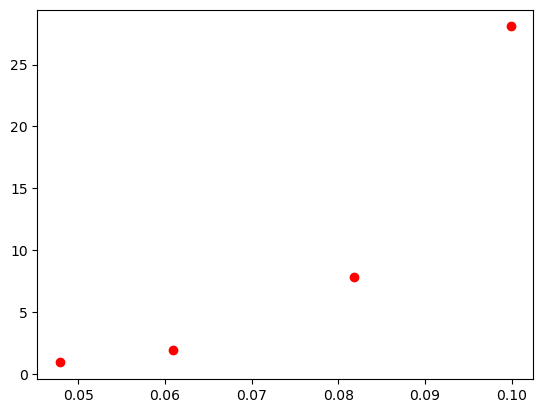

In [25]:
# Generating Plots of meangrade
plt.plot(meangrade, List_Stab[2], "ro")

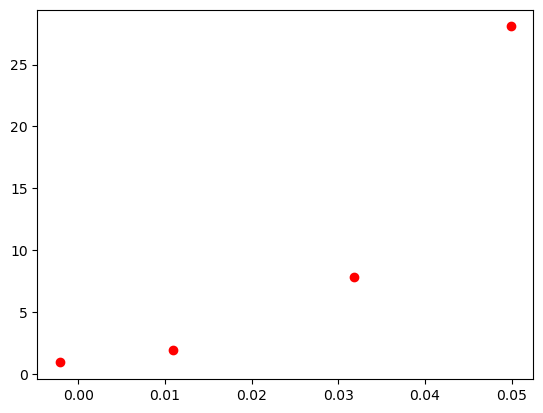

In [26]:
# Generating Plots of gammaminusbeta
plt.plot(gammaminusbeta, List_Stab[2], "ro")

In [25]:
Graph = MGL[0].values

In [170]:
g = ig.Graph.Adjacency((Graph>0).tolist(), mode = 'undirected')

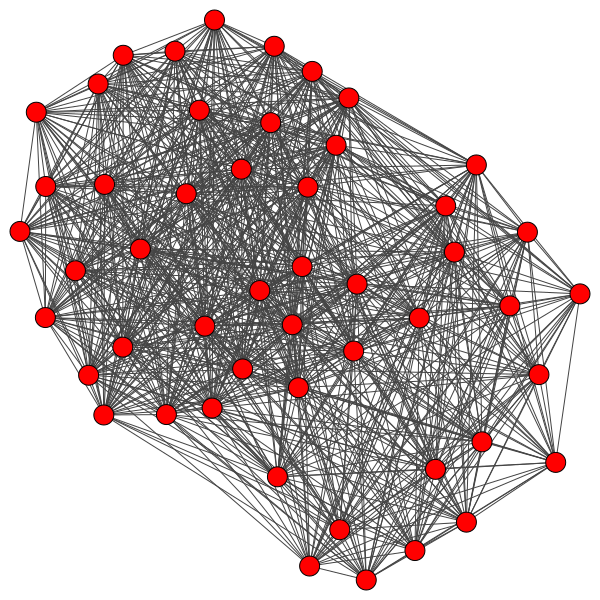

In [171]:
layout = g.layout()
ig.plot(g, layout=layout)

In [172]:
g.get_edgelist()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 40),
 (0, 41),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 43),
 (1, 44),
 (1, 46),
 (1, 47),
 (1, 48),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2,

In [173]:
MGL[0]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.003612,0.003612,0.000000,0.007223,0.003612,0.016854,0.003612,0.001204,0.001204,0.008427
1,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.010835,0.001204,0.000000,0.006019,0.007223,0.000000,0.002408,0.004815,0.006019,0.000000
2,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.000000,0.004815,0.000000,0.000000,0.003612,0.000000,0.008427,0.001204,0.001204,0.002408
3,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.000000,0.000000,0.003612,0.003612,0.003612,0.000000,0.000000,0.008427,0.001204,0.000000
4,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,0.002000,...,0.000000,0.002408,0.009631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,0.002000,...,0.001204,0.001204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,0.002000,...,0.013242,0.006019,0.000000,0.000000,0.001204,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,0.002000,...,0.000000,0.000000,0.000000,0.006019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,0.002000,...,0.000000,0.007223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.002000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001204,0.000000,0.000000,0.000000


In [174]:
MGL[0].loc[0,0]

0.0

In [ ]:
edgelist = []
weights = []

for i in MGL[0].index:
    